In [15]:
import cPickle as pickle
import h5py

def PlotSeries(start, stop, text,labels, ylim=None, mod=1, ylim_glob=None, line=None, mod_k=False):
    plt.figure(figsize=(15,2.5))
    if mod_k is True:
        models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    else: 
        models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_l_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5')
    
    #print 'log-like, TS:', 'center_high_res_no_dm', np.sum(h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC_no_dm/'].attrs['loglike_total']-h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    #print 'log-like, TS:', 'center_high_res', np.sum(h_center_HR['/fit_results/GC/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-h_center_HR['/fit_results/GC/'].attrs['loglike_total'])
    
    fits = []
    ll, ll_no_dm = [], []
    llg1, llg2, llg3, llg4 = [],[],[],[]
    
    p7v6_LL_total = 2*(np.sum(pickle.load(open('../p7v6_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC/'].attrs['loglike_total'])
    p6v11_LL_total = 2*(np.sum(pickle.load(open('../p6v11_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC/'].attrs['loglike_total'])
    
    p7v6_LL_total_no_dm = 2*(np.sum(pickle.load(open('../p7v6_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    p6v11_LL_total_no_dm = 2*(np.sum(pickle.load(open('../p6v11_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    
    for i, model in enumerate(models):        
        try:
            
            h = h5py.File('../mod_c/'+model)
            
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            #print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            
            fit_global = h['/fit_results/global'].attrs
            llg1.append(fit_global['localfval'])
            #print fit_global['localfval'], fit_global['outerfval'], fit_global['innerfval']
            llg2.append(fit_global['outerfval'])
            llg3.append(fit_global['innerfval'])
            llg4.append(llg1[-1]+llg2[-1]+llg3[-1])
            
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(131)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label='Base 2D',capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(132)
            
#             #print h_base['/fit_results/GC/'].attrs.keys()
#             if i%mod==0:
#                 TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
#                 plt.plot(E/1e3, TS)

        except:
            ll.append(-1e10)
            ll_no_dm.append(-1e10)
            llg1.append(-1e10)
            llg2.append(-1e10)
            llg3.append(-1e10)
            llg4.append(-1e10)
            print 'no results found for model ', model
    
    
    plt.subplot(132)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,2e-6)
    plt.text(.05,.95, text, transform=plt.gca().transAxes, fontsize=8)
    
#     if 'spiral' in text:
#         plt.yscale('symlog')
#         plt.ylim(5e-7,2e-6)
    
#     plt.subplot(222)
#     plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
#     plt.xlabel(r'$\rm{E\ [GeV]}$')
#     plt.xscale('log')
#     plt.ylim(-50,200)
            
    plt.subplot(132)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
        
    if line is not None:
        yl = plt.ylim()
        plt.vlines(line, yl[0],yl[1],color='k',alpha=.25, linestyle='--')
    
    plt.hlines(p7v6_LL_total, -1, len(labels), color='firebrick')
    plt.hlines(p6v11_LL_total, -1, len(labels), color='firebrick')
    plt.hlines(p7v6_LL_total_no_dm, -1, len(labels), color='steelblue', linestyles='--')
    plt.hlines(p6v11_LL_total_no_dm, -1, len(labels), color='steelblue', linestyles='--' )
    plt.text(.05*(plt.xlim()[1]-plt.xlim()[0]), p6v11_LL_total-.06*(plt.ylim()[1]-plt.ylim()[0]),'P6V11', color='purple', fontsize=8)
    plt.text(.05*(plt.xlim()[1]-plt.xlim()[0]), p7v6_LL_total-.06*(plt.ylim()[1]-plt.ylim()[0]),'P7V6', color='purple', fontsize=8)
    plt.text(.05*(plt.xlim()[1]-plt.xlim()[0]), p6v11_LL_total_no_dm-.06*(plt.ylim()[1]-plt.ylim()[0]),'P6V11 No DM', color='purple', fontsize=8)
    plt.text(.05*(plt.xlim()[1]-plt.xlim()[0]), p7v6_LL_total_no_dm-.06*(plt.ylim()[1]-plt.ylim()[0]),'P7V6 No DM', color='purple', fontsize=8)
               
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    
    plt.subplot(133)
    
    # ------------------------------------------------
    # Global fitting plot
    # ------------------------------------------------
    plt.plot(range(len(labels)), -2*(llg1[1:]-llg1[0]),marker='o',ls=':', markersize=4, color='firebrick', label='Local')
    plt.plot(range(len(labels)), -2*(llg2[1:]-llg2[0]),marker='o',ls=':', markersize=4,color='steelblue', label='Outer')
    plt.plot(range(len(labels)), -2*(llg3[1:]-llg3[0]),marker='o',ls=':', markersize=4,color='goldenrod', label='Inner')
    plt.plot(range(len(labels)), -2*(llg4[1:]-llg4[0]),marker='o',ls=':', markersize=4,color='cyan', label='Total')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim_glob is not None:
        plt.ylim(ylim_glob)
    if line is not None:
        yl = plt.ylim()
        plt.vlines(line,yl[0],yl[1],color='k',alpha=.25, linestyle='--')
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4, ncol=2)
    

def PlotModels(pathList, text,labels, ylim=None):
    plt.figure(figsize=(14,2.5))
    models = ['../base_2D.hdf5'] + pathList
    h_base = h5py.File('../base_2D.hdf5')
    
    fits = []
    ll, ll_no_dm = [], []

    
    for i, model in enumerate(models):
        #try:
        h_base = h5py.File('../base_2D.hdf5')
        h = h5py.File('../mod_c/'+model)
        #try:
        h['/fit_results/GC/'].attrs.keys()
        fit = h['/fit_results/GC'].attrs
        fit_no_dm = h['/fit_results/GC_no_dm'].attrs
        print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
        ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
        ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
        #print fit.keys()
        E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']

        plt.subplot(131)

        if i==0:
            plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                         label=model,capthick=1, capsize=2, ls=':' )
        else:
            plt.errorbar(E/1e3,(E**2*flux/1e3), 
                         label=labels[i-1],capthick=1, capsize=2, ls='-' )

        plt.subplot(132)

        #print h_base['/fit_results/GC/'].attrs.keys()
       
        TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
        plt.plot(E/1e3, TS)

#         except:
#             ll.append(-1e10)
#             ll_no_dm.append(-1e-10)
#             print 'no results found for model ', model
    
    
    plt.subplot(133)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-8,2e-6)
    
    plt.subplot(132)
    plt.ylabel(r'$-\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-200,50)
            
    plt.subplot(133)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4, ncol=2)


#PlotModels(['../mod_c/mod_e_center_high_res.hdf5','../mod_c/mod_e_center_high_res_XCO.hdf5'], text='High-Res CR', labels=['HR','HR $X_{CO}$'])



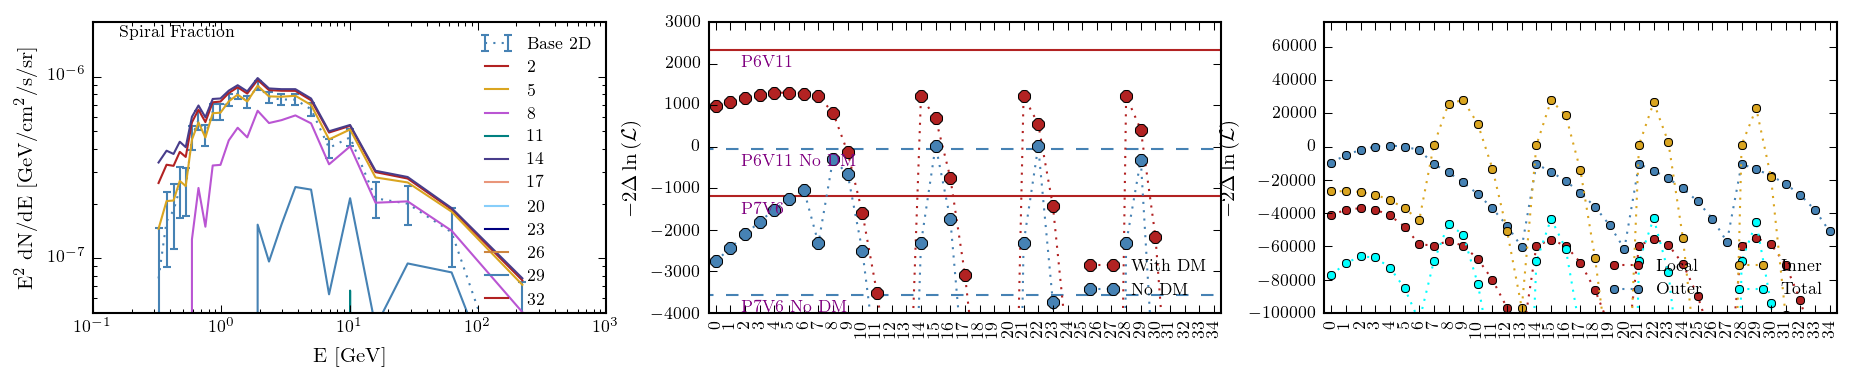

no results found for model  mod_l_60_XCO_stripped.hdf5
no results found for model  mod_l_61_XCO_stripped.hdf5
no results found for model  mod_l_62_XCO_stripped.hdf5


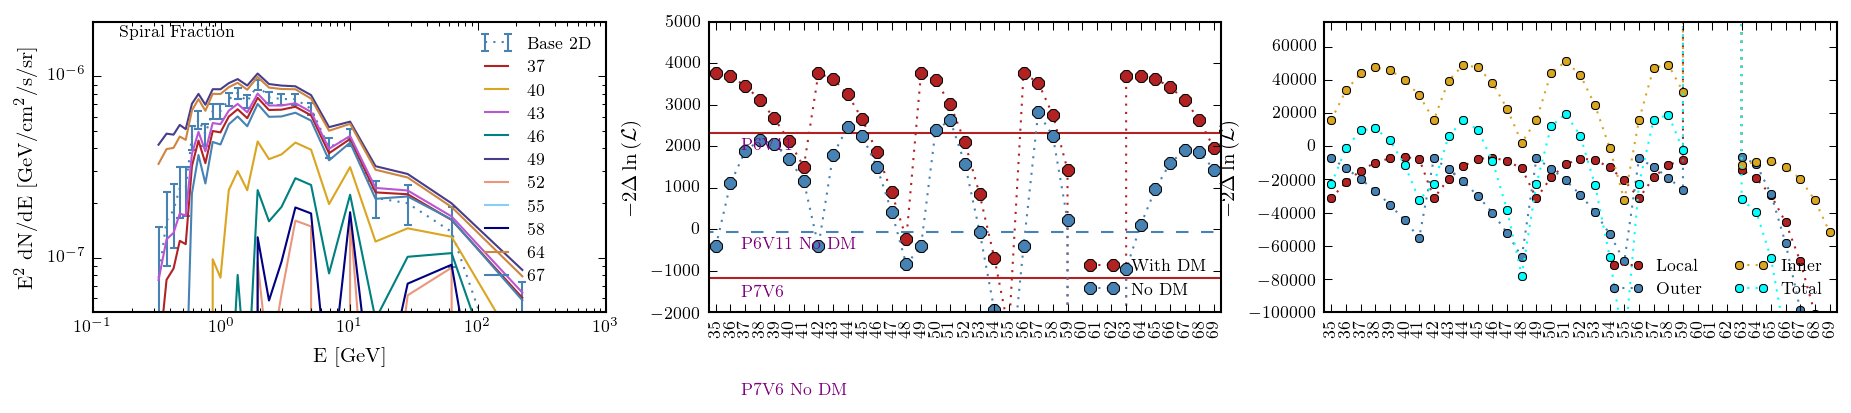

In [16]:

PlotSeries(start=0, stop=35, text='Spiral Fraction', labels=[str(i) for i in range(0,35)], mod=3, ylim=(-4e3,3e3), ylim_glob=(-1e5,.75e5))
plt.show()
PlotSeries(start=35, stop=70, text='Spiral Fraction', labels=[str(i) for i in range(35,70)], mod=3, ylim=(-2e3,5e3), ylim_glob=(-1e5,.75e5))


# PEB HI+H2.
##Default Model is $v_a=35$ km/s, $D_0=7.2e28$, $f_{sprl}=.2$, SNR source dist, $z_{max}=3.5$ kpc, $T_s=150$, Mag5

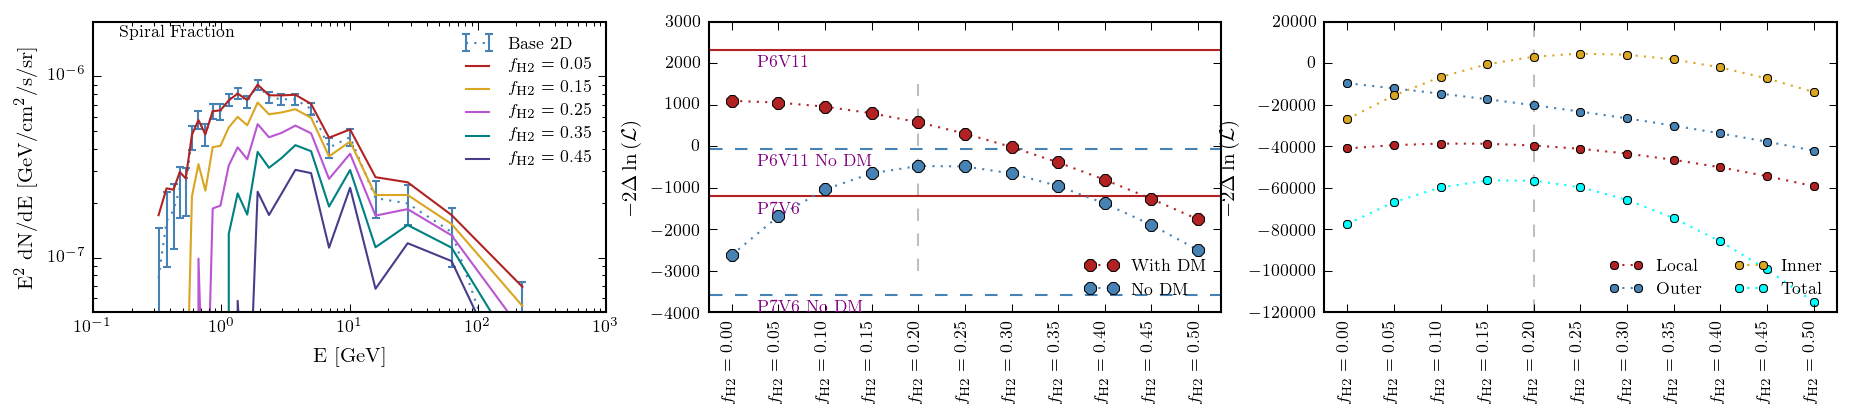

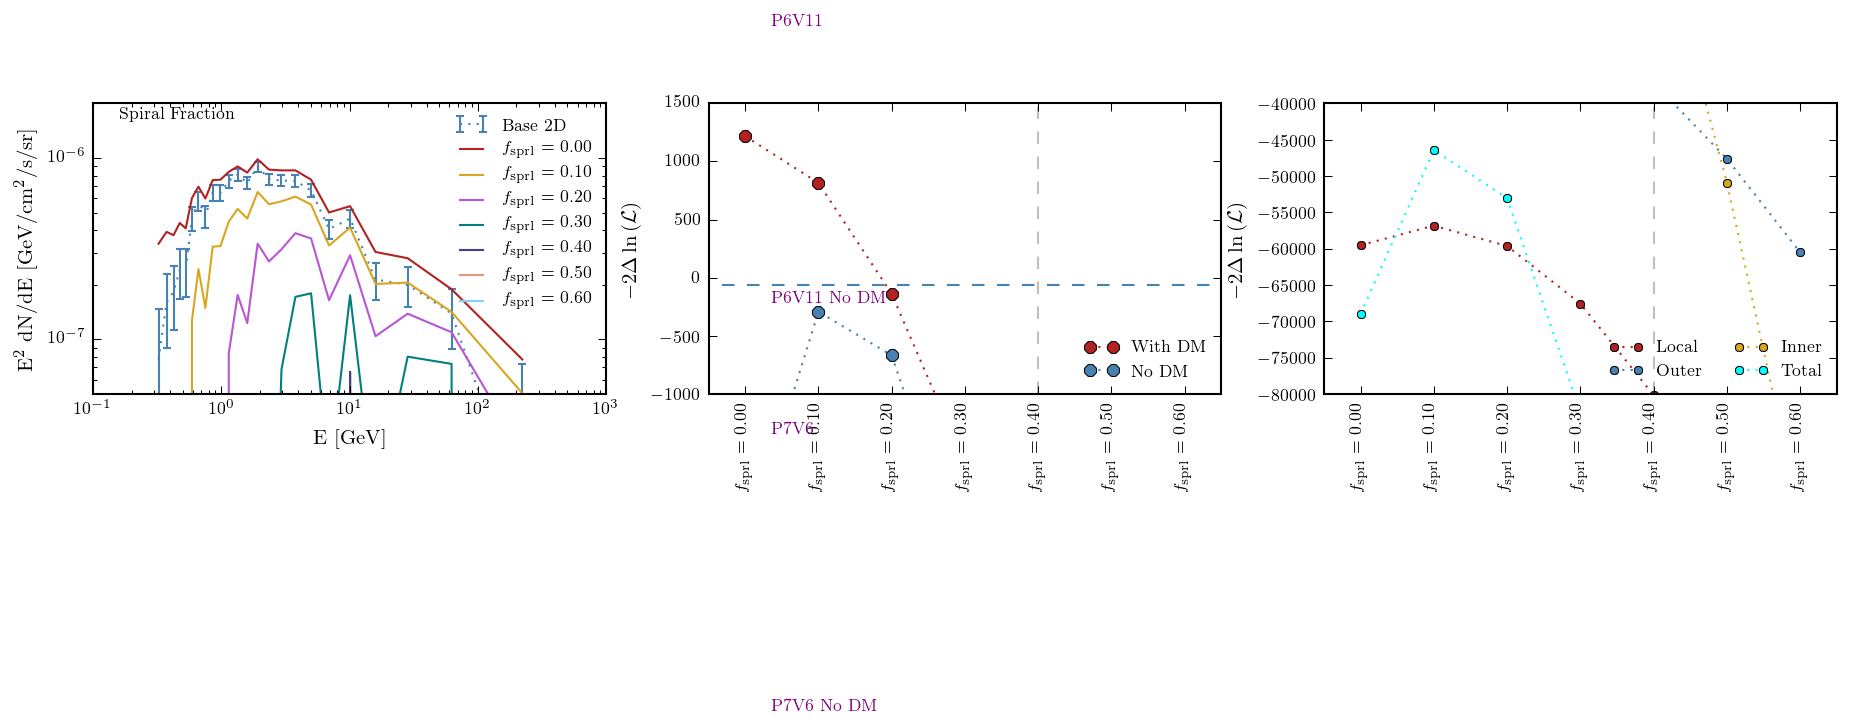

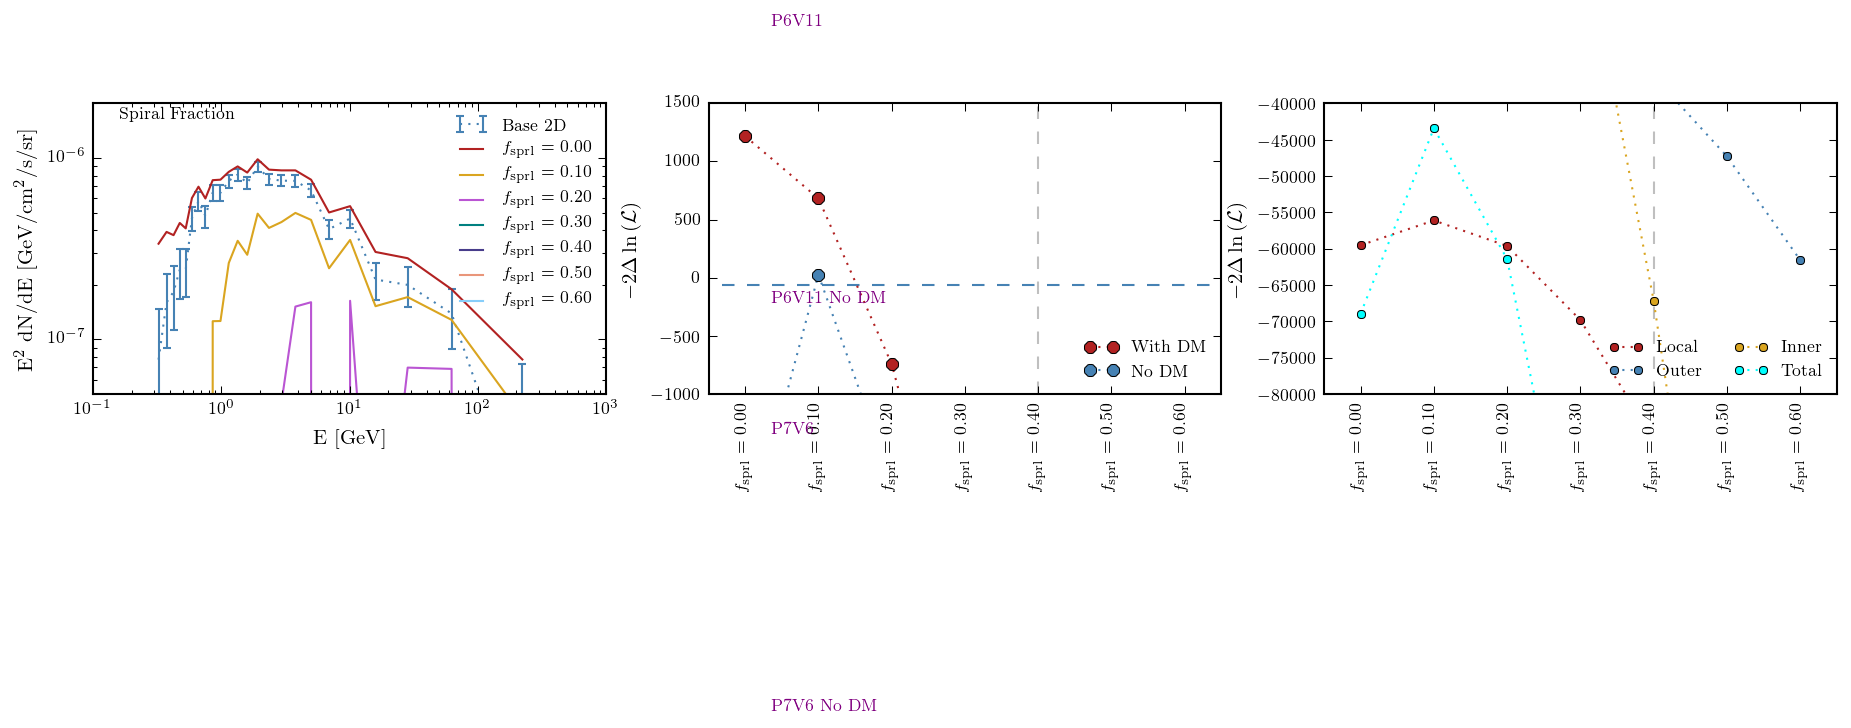

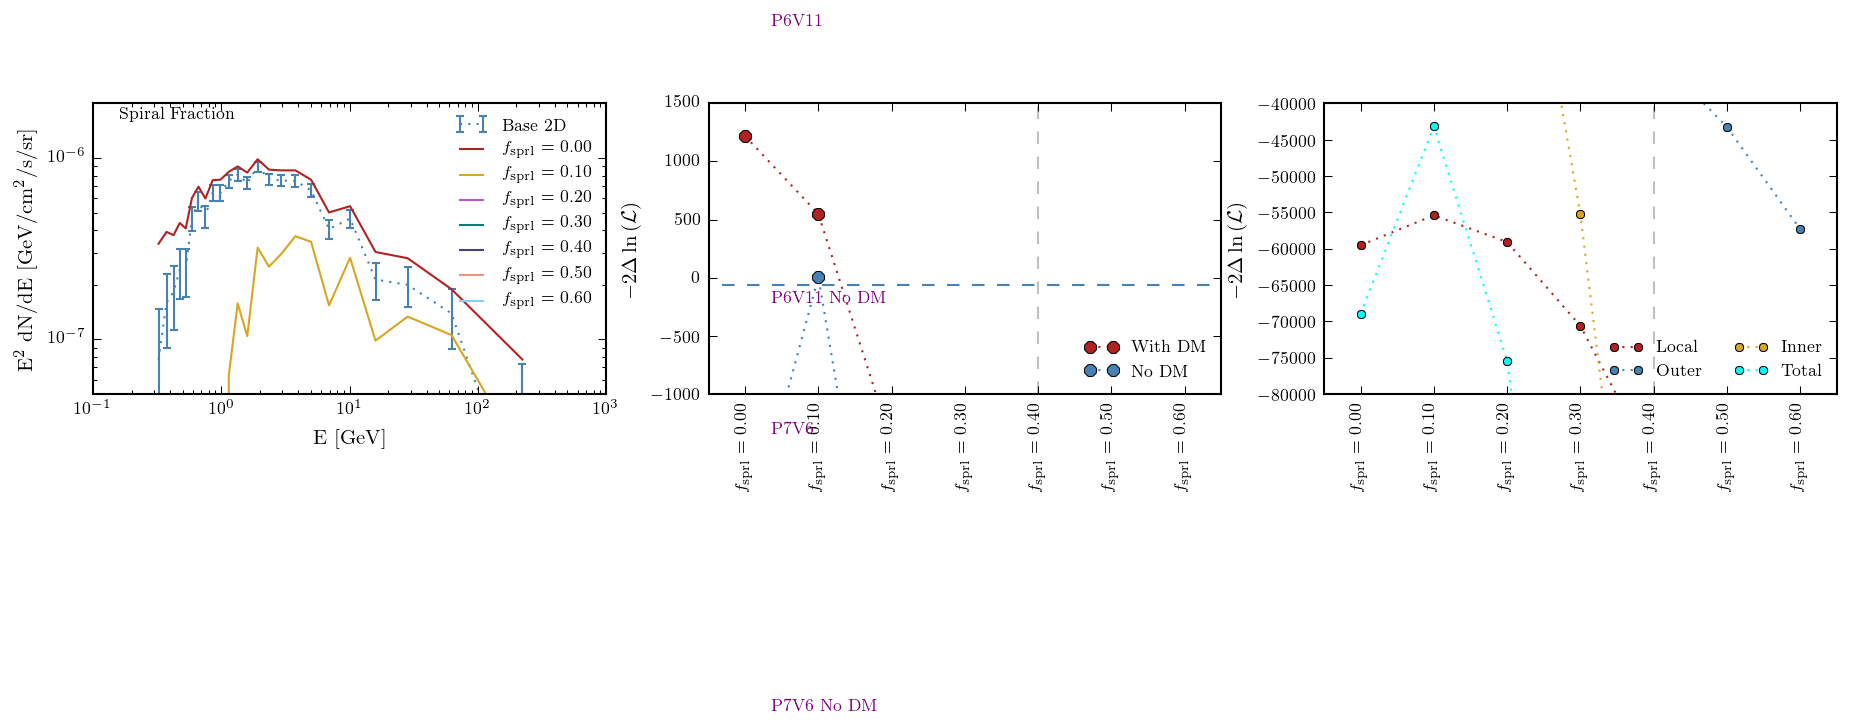

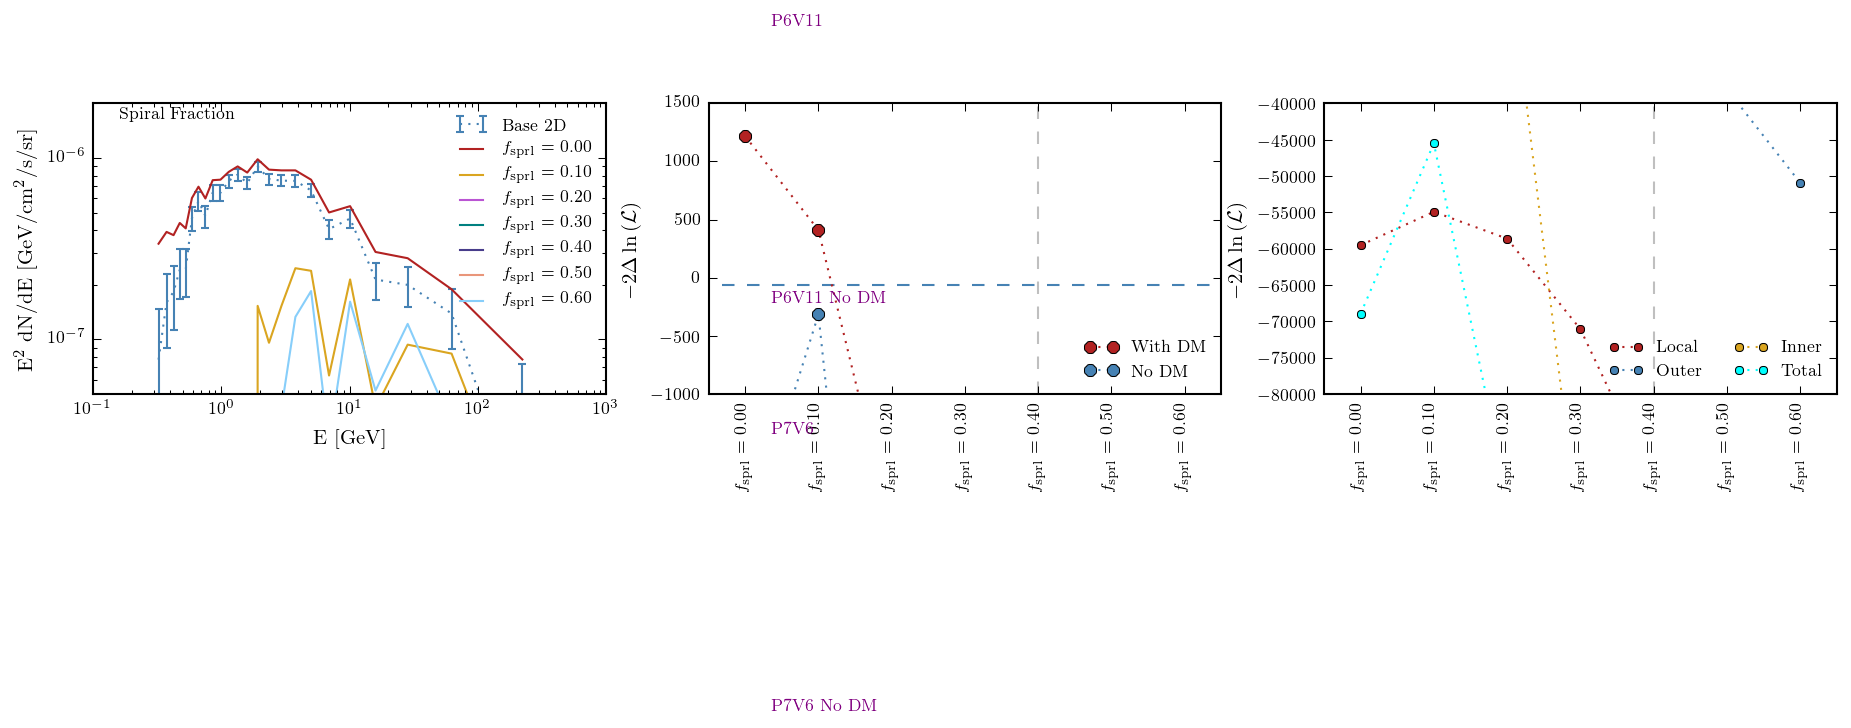

In [17]:

PlotSeries(start=0, stop=11, text='Spiral Fraction', labels=[r'$f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.5,11)], mod=2, line=4, mod_k=True)
plt.show()
PlotSeries(start=7, stop=14, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.2f$'%i for i in np.linspace(0,.6,7)], mod=1, line=4, ylim=(-1000,1500), ylim_glob=(-8e4,-4e4))
plt.show()
PlotSeries(start=14, stop=21, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.2f$'%i for i in np.linspace(0,.6,7)], mod=1, line=4,ylim=(-1000,1500), ylim_glob=(-8e4,-4e4))
plt.show()
PlotSeries(start=21, stop=28, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.2f$'%i for i in np.linspace(0,.6,7)], mod=1, line=4, ylim=(-1000,1500), ylim_glob=(-8e4,-4e4))
plt.show()
PlotSeries(start=28, stop=35, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.2f$'%i for i in np.linspace(0,.6,7)], mod=1, line=4, ylim=(-1000,1500), ylim_glob=(-8e4,-4e4))
plt.show()


# Galrop HI, galprop H2.   

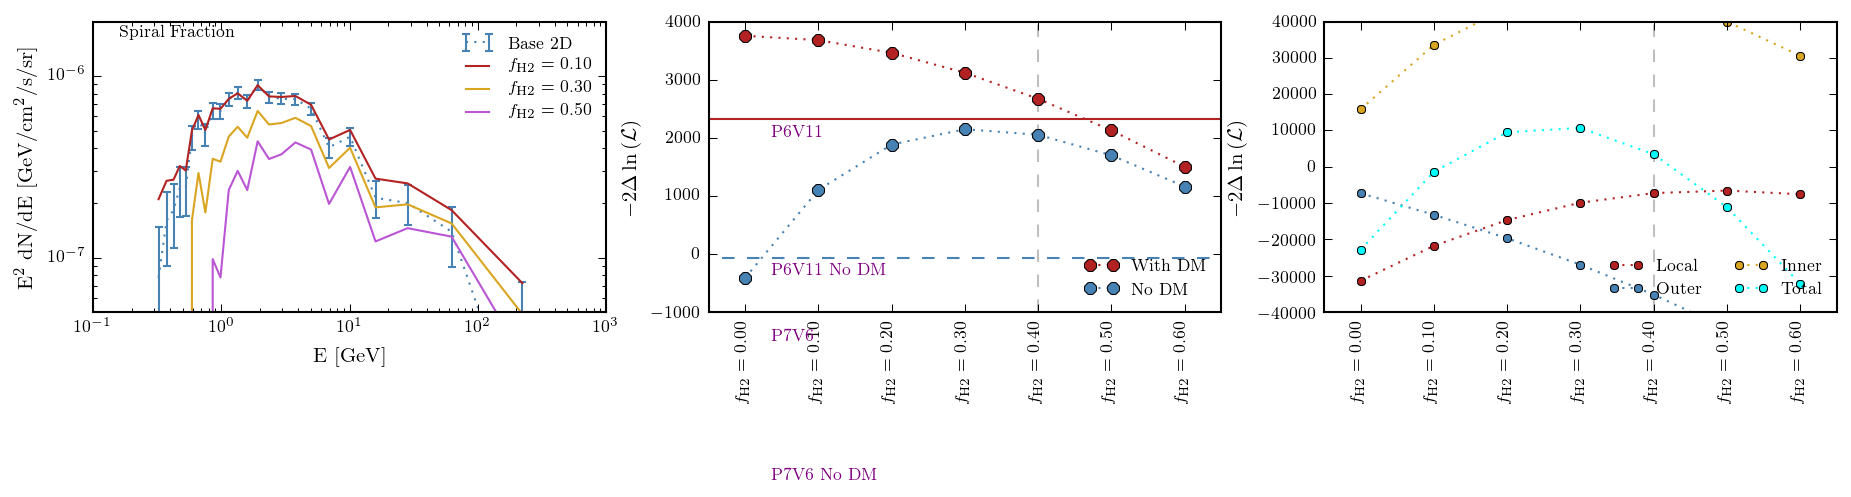

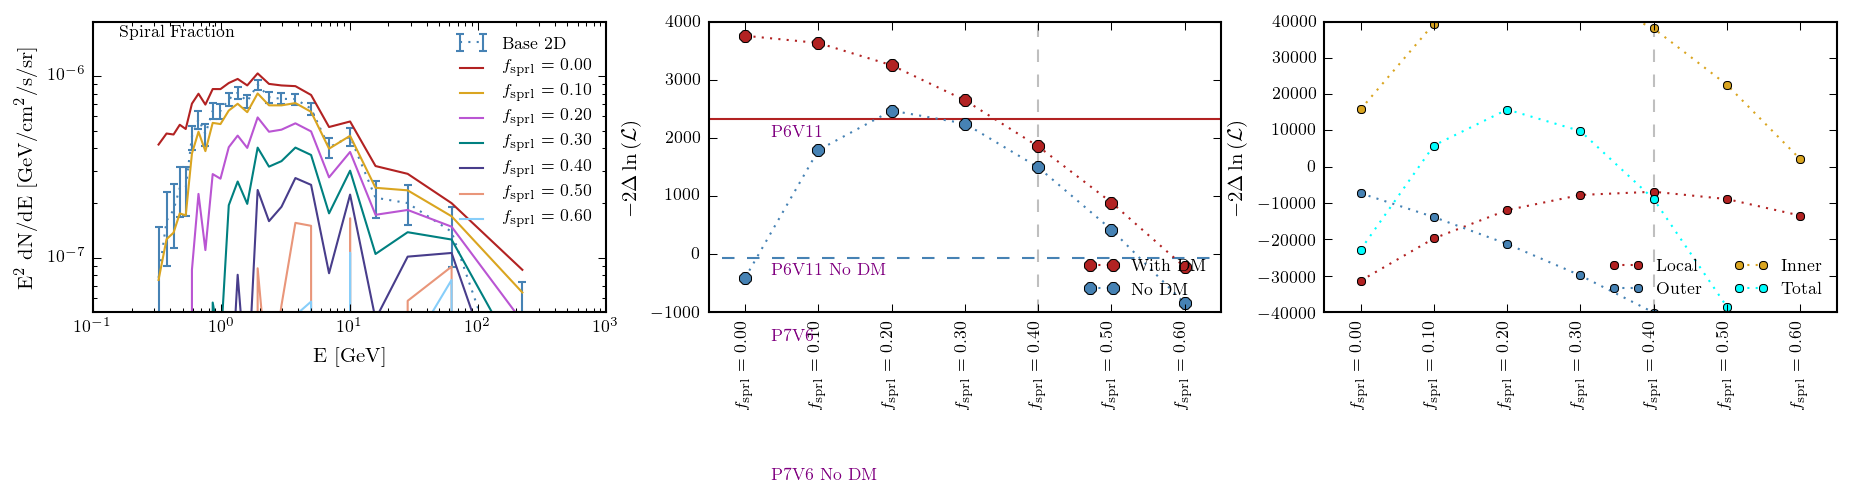

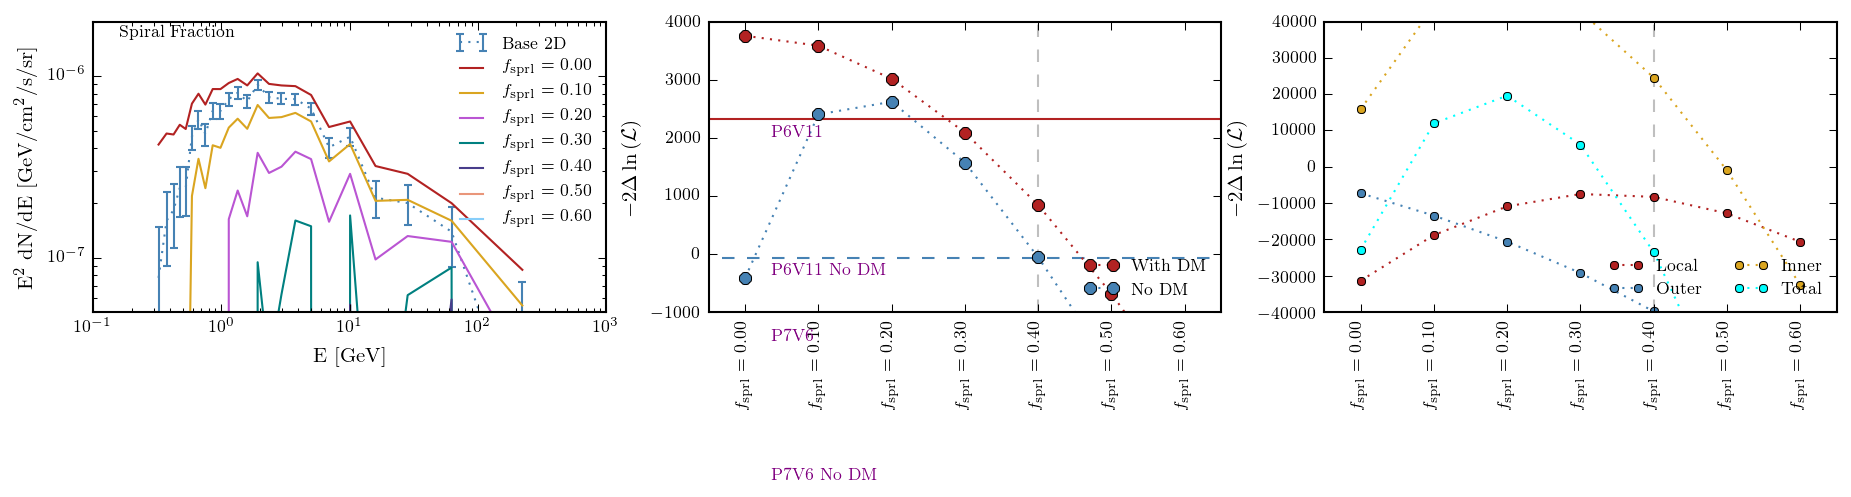

no results found for model  mod_l_60_XCO_stripped.hdf5
no results found for model  mod_l_61_XCO_stripped.hdf5
no results found for model  mod_l_62_XCO_stripped.hdf5


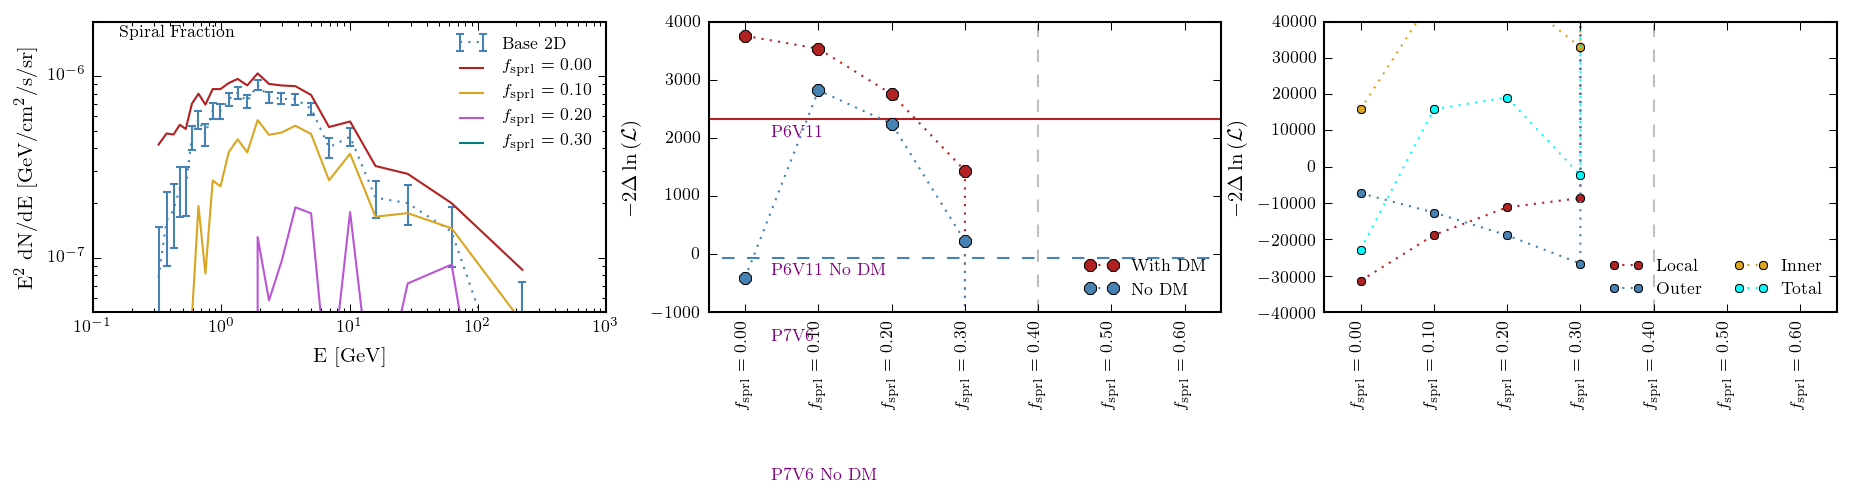

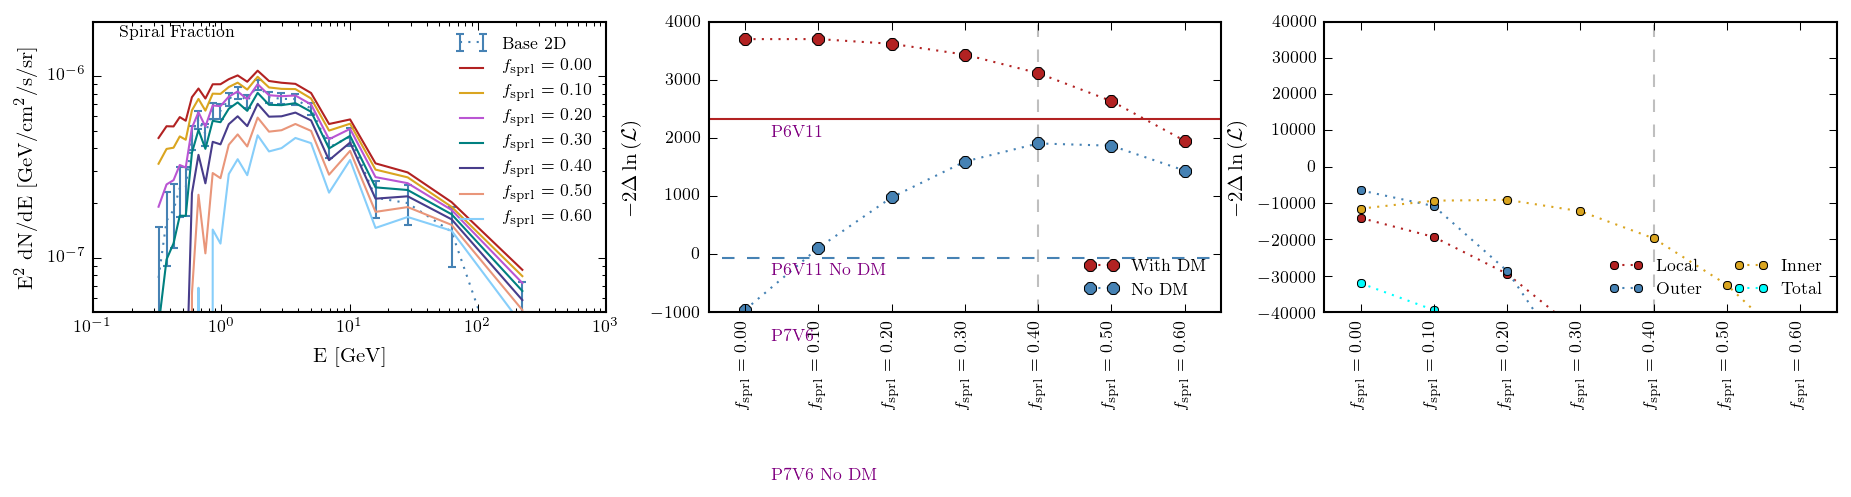

In [19]:

PlotSeries(start=35, stop=42, text='Spiral Fraction', labels=[r'$f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.6,7)], mod=2, line=4, ylim=(-1000,4000), ylim_glob=(-4e4,4e4) )
plt.show()
PlotSeries(start=42, stop=49, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.2f$'%i for i in np.linspace(0,.6,7)], mod=1, line=4, ylim=(-1000,4000), ylim_glob=(-4e4,4e4))
plt.show()
PlotSeries(start=49, stop=56, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.2f$'%i for i in np.linspace(0,.6,7)], mod=1, line=4,ylim=(-1000,4000), ylim_glob=(-4e4,4e4))
plt.show()
PlotSeries(start=56, stop=63, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.2f$'%i for i in np.linspace(0,.6,7)], mod=1, line=4, ylim=(-1000,4000), ylim_glob=(-4e4,4e4))
plt.show()
PlotSeries(start=63, stop=70, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.2f$'%i for i in np.linspace(0,.6,7)], mod=1, line=4, ylim=(-1000,4000), ylim_glob=(-4e4,4e4))
plt.show()


In [ ]:
import cPickle as pickle
import h5py

def PlotMixtures():
    
    models = ['mod_l_%i_XCO_stripped.hdf5'%i for i in range(0, )]
    LL, LL_no_dm = np.zeros((11,11)), np.zeros((11,11))
    for i, model in enumerate(models):
        h = h5py.File('../mod_c/'+model)

        peb_frac = ['/fit_results/galprop_frac_%1.2f/'%frac for frac in np.linspace(0,1,11)]
        LL[i,:] = np.array([h[frac].attrs['loglike_total'] for frac in peb_frac])
        
        peb_frac_no_dm = ['/fit_results/galprop_frac_no_dm_%1.2f/'%frac for frac in np.linspace(0,1,11)]
        LL_no_dm[i,:] = np.array([h[frac].attrs['loglike_total'] for frac in peb_frac_no_dm])
    
    
    plt.figure(figsize=(12,2.5))
    
    plt.subplot(131)
    plt.imshow(2*(LL-np.min(LL)), origin='lower', cmap='rainbow', interpolation='nearest', vmax=3500, extent=[-.05,1.05,-0.025,.525], aspect=2)
    plt.plot()
    plt.colorbar(label=r'$\Delta \chi^2 = -2\Delta\log{(\mathcal{L})}$')
    plt.ylabel(r'$f_{\rm H2}$')
    plt.xlabel(r'$f_{\rm Galprop\ Gas}$')
    plt.text(0,.45,'With DM',fontsize=10)
    
    plt.scatter(1, .25 , color='cyan', s=8)
    plt.scatter(0, .2 , color='cyan', s=8)
    plt.scatter(1, .35 , color='goldenrod', s=8, marker='s')
    plt.scatter(0, .25 , color='goldenrod', s=8, marker='s')
    plt.ylim(-.025,.525)
    plt.xlim(-.05,1.05)
    
    plt.subplot(132)
    plt.imshow(2*(LL_no_dm-np.min(LL_no_dm)), origin='lower', cmap='rainbow', interpolation='nearest', vmax=3500, extent=[-.05,1.05,0.-.025,.525], aspect=2)
    plt.plot()
    plt.colorbar(label=r'$\Delta \chi^2 = -2\Delta\log{(\mathcal{L})}$')
    plt.ylabel(r'$f_{\rm H2}$')
    plt.xlabel(r'$f_{\rm Galprop\ Gas}$')
    plt.text(0,.45,'No DM',fontsize=10)
    
    plt.scatter(1, .25 , color='cyan', s=8)
    plt.scatter(0, .2 , color='cyan', s=8)
    plt.scatter(1, .35 , color='goldenrod', s=8, marker='s')
    plt.scatter(0, .25 , color='goldenrod', s=8, marker='s')
    plt.ylim(-.025,.525)
    plt.xlim(-.05,1.05)
    
    plt.subplot(133)
    plt.imshow(-2*(LL-LL_no_dm), origin='lower', cmap='rainbow', interpolation='nearest', extent=[-.05,1.05,-0.025,.525], aspect=2)
    plt.plot()
    plt.colorbar(label=r'${\rm TS}=-2\Delta\log{(\mathcal{L})}$')
    plt.ylabel(r'$f_{\rm H2}$')
    plt.xlabel(r'$f_{\rm Galprop\ Gas}$')
    plt.text(0,.45,'TS of DM',fontsize=10, color='white')
    
    plt.scatter(1, .25 , color='cyan', s=8)
    plt.scatter(0, .2 , color='cyan', s=8)
    plt.scatter(1, .35 , color='goldenrod', s=8, marker='s')
    plt.scatter(0, .25 , color='goldenrod', s=8, marker='s')
    plt.ylim(-.025,.525)
    plt.xlim(-.05,1.05)
    
    plt.show()
    
    
